In [ ]:
!pip install snscrape
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 947.9 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import sys
import re
from math import sqrt
import string
import json
import os

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import snscrape.modules.twitter as sntwitter

from datetime import datetime
from datetime import date, timedelta

In [ ]:
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, f1_score

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, Conv2D, MaxPooling2D ,MaxPooling1D, Flatten, Bidirectional
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

seed=42

In [ ]:
import torch
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('TSLA_data.csv')
df = pd.read_csv('/content/drive/MyDrive/Stock_Price_Prediction_with_Twitter_Sentiment_Analysis-main/Data/TSLA_data.csv')
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
0,2022-03-01,289.893341,296.626678,284.593323,288.123322,288.123322,74766900,0.000000,0,39
1,2022-03-02,290.709991,295.493347,281.423340,293.296661,293.296661,74643300,-0.263158,-10,38
2,2022-03-03,292.923340,295.480011,277.533325,279.763336,279.763336,61623600,-0.341463,-14,41
3,2022-03-04,283.033325,285.216675,275.053345,279.429993,279.429993,66999600,0.051282,2,39
4,2022-03-07,285.433319,288.713318,268.190002,268.193329,268.193329,72494100,-0.150000,-6,40
5,2022-03-08,265.176666,283.329987,260.723328,274.799988,274.799988,80399100,-0.102564,-4,39
6,2022-03-09,279.826660,286.853333,277.336670,286.323334,286.323334,59184000,-0.121951,-5,41
7,2022-03-10,283.816681,284.816681,270.119995,279.433319,279.433319,58648500,-0.175000,-7,40
8,2022-03-11,280.066681,281.266663,264.589996,265.116669,265.116669,67037100,-0.075000,-3,40
9,2022-03-14,260.203339,266.899994,252.013336,255.456665,255.456665,71152200,-0.325000,-13,40


In [ ]:
df.shape

(293, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       293 non-null    datetime64[ns]
 1   Open       293 non-null    float64       
 2   High       293 non-null    float64       
 3   Low        293 non-null    float64       
 4   Close      293 non-null    float64       
 5   Adj Close  293 non-null    float64       
 6   Volume     293 non-null    int64         
 7   P_mean     293 non-null    float64       
 8   P_sum      293 non-null    int64         
 9   twt_count  293 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 23.0 KB


In [ ]:
df.describe()


,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
count,293,293.000000,293.000000,293.000000,293.000000,293.000000,2.930000e+02,293.000000,293.000000,293.000000
mean,2022-09-28 01:38:17.610921472,232.293458,237.845597,225.994505,231.786542,231.786542,1.087134e+08,-0.100636,-3.969283,39.187713
min,2022-03-01 00:00:00,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07,-0.512195,-21.000000,34.000000
25%,2022-06-14 00:00:00,186.740005,191.270004,182.589996,186.789993,186.789993,7.262870e+07,-0.184211,-7.000000,38.000000
50%,2022-09-28 00:00:00,225.500000,231.173340,218.360001,227.263336,227.263336,9.312270e+07,-0.097561,-4.000000,40.000000
75%,2023-01-12 00:00:00,283.079987,288.670013,275.239990,283.333344,283.333344,1.388581e+08,0.000000,0.000000,40.000000
max,2023-04-28 00:00:00,378.766663,384.290009,362.433319,381.816681,381.816681,3.065906e+08,0.297297,12.000000,41.000000
std,NaN,61.435272,62.460634,60.142783,61.122652,61.122652,4.790174e+07,0.144234,5.673395,1.639282


In [ ]:
df['sentiment_analysis']=df['P_mean']
df['sentiment_analysis'] = df['sentiment_analysis'].apply(lambda x: 'pos' if x > 0 else 'nue' if x == 0 else 'neg')

sentiment_counts = df['sentiment_analysis'].value_counts()
sentiment_counts

sentiment_analysis
neg    211
pos     64
nue     18
Name: count, dtype: int64

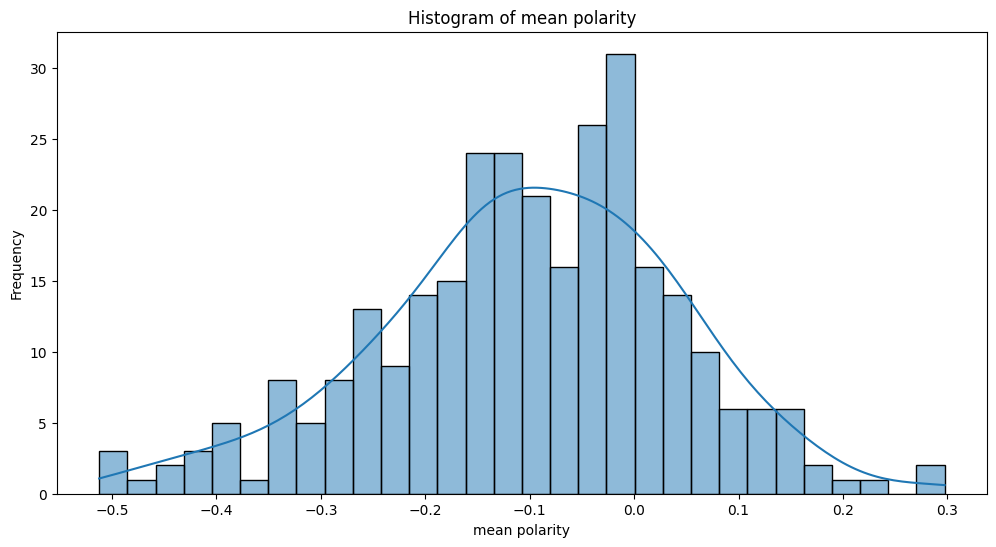

In [ ]:
stock_data = df

plt.figure(figsize=(12, 6))
sns.histplot(stock_data['P_mean'], bins=30, kde=True, edgecolor='black')
plt.title('Histogram of mean polarity')
plt.xlabel('mean polarity')
plt.ylabel('Frequency')
plt.show()

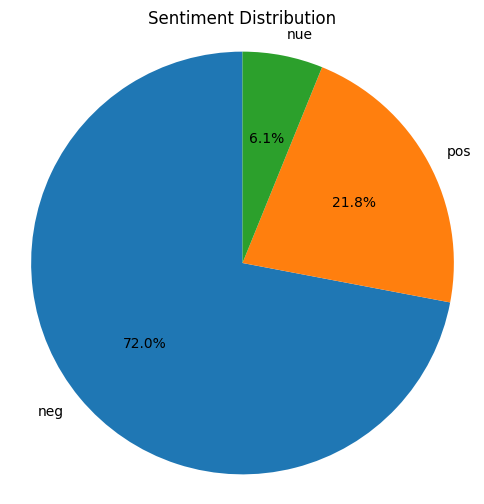

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

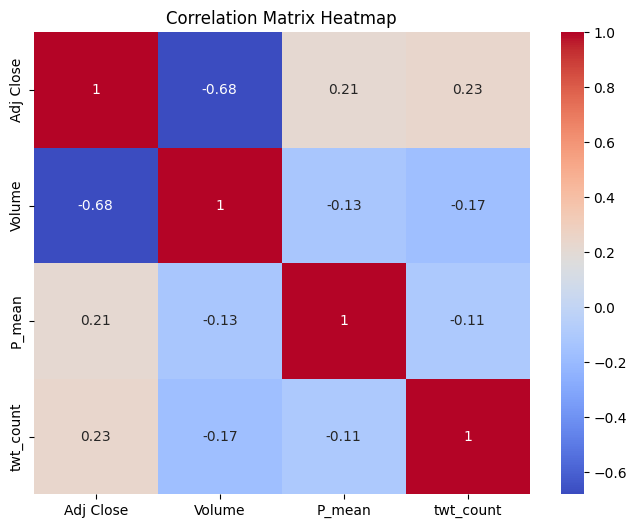

In [ ]:
# Plotting the correlation matrix heatmap
correlation_matrix = stock_data[['Adj Close', 'Volume', 'P_mean', 'twt_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

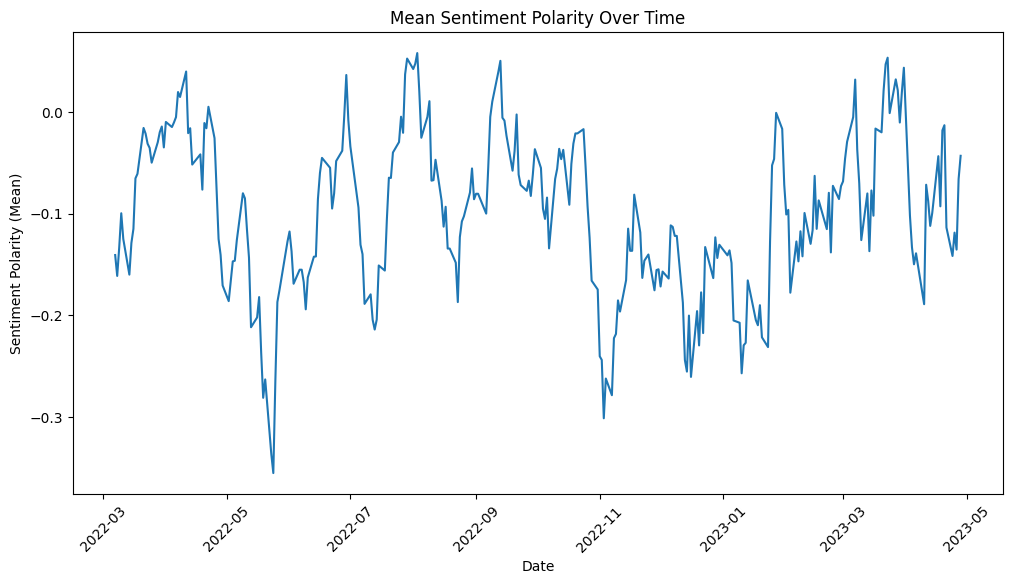

In [ ]:
plt.figure(figsize=(12, 6))
rolling_mean = stock_data['P_mean'].rolling(window=5).mean()
plt.plot(stock_data['date'], rolling_mean)
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity (Mean)')
plt.title('Mean Sentiment Polarity Over Time')
plt.xticks(rotation=45)
plt.show()

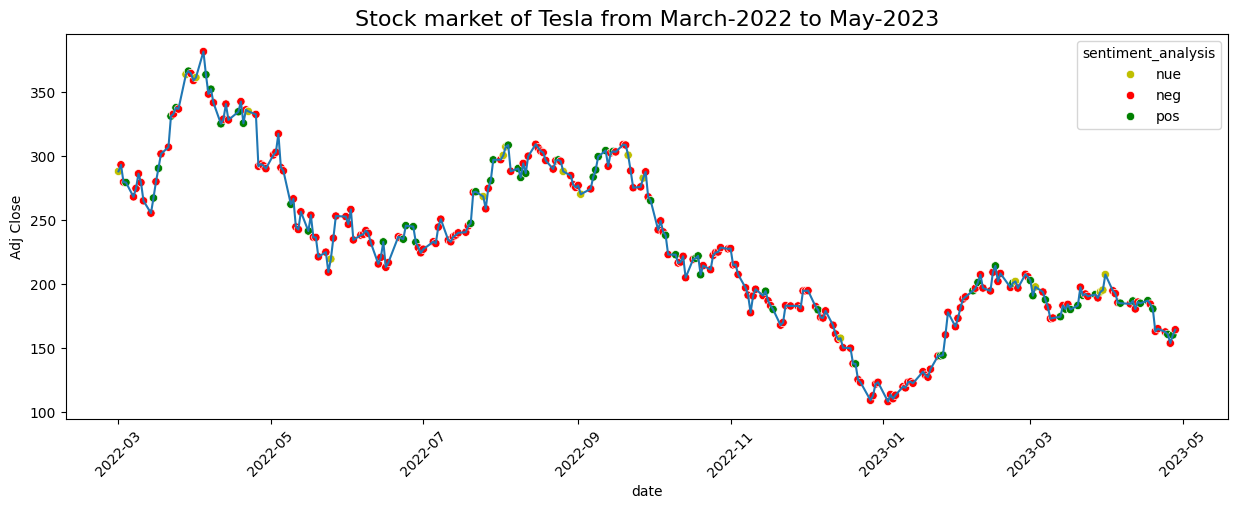

In [ ]:
plt.figure(figsize=(15,5));
sns.lineplot(x = df["date"], y = df["Adj Close"])

sns.scatterplot(x=df["date"],y=df['Adj Close'],hue=df['sentiment_analysis'],palette=['y','r','g'])
plt.xticks(rotation=45);
plt.title("Stock market of Tesla from March-2022 to May-2023",fontsize=16);

In [ ]:
df.head(10)

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count,sentiment_analysis
0,2022-03-01,289.893341,296.626678,284.593323,288.123322,288.123322,74766900,0.000000,0,39,nue
1,2022-03-02,290.709991,295.493347,281.423340,293.296661,293.296661,74643300,-0.263158,-10,38,neg
2,2022-03-03,292.923340,295.480011,277.533325,279.763336,279.763336,61623600,-0.341463,-14,41,neg
3,2022-03-04,283.033325,285.216675,275.053345,279.429993,279.429993,66999600,0.051282,2,39,pos
4,2022-03-07,285.433319,288.713318,268.190002,268.193329,268.193329,72494100,-0.150000,-6,40,neg
5,2022-03-08,265.176666,283.329987,260.723328,274.799988,274.799988,80399100,-0.102564,-4,39,neg
6,2022-03-09,279.826660,286.853333,277.336670,286.323334,286.323334,59184000,-0.121951,-5,41,neg
7,2022-03-10,283.816681,284.816681,270.119995,279.433319,279.433319,58648500,-0.175000,-7,40,neg
8,2022-03-11,280.066681,281.266663,264.589996,265.116669,265.116669,67037100,-0.075000,-3,40,neg
9,2022-03-14,260.203339,266.899994,252.013336,255.456665,255.456665,71152200,-0.325000,-13,40,neg


In [ ]:
train_dates = pd.to_datetime(df['date'])

cols = ['Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Adj Close',
    'P_mean']

training_df = df[cols].astype(float)
training_df.index = df['date']
training_df

,Open,High,Low,Close,Volume,Adj Close,P_mean
date,,,,,,,
2022-03-01,289.893341,296.626678,284.593323,288.123322,74766900.0,288.123322,0.000000
2022-03-02,290.709991,295.493347,281.423340,293.296661,74643300.0,293.296661,-0.263158
2022-03-03,292.923340,295.480011,277.533325,279.763336,61623600.0,279.763336,-0.341463
2022-03-04,283.033325,285.216675,275.053345,279.429993,66999600.0,279.429993,0.051282
2022-03-07,285.433319,288.713318,268.190002,268.193329,72494100.0,268.193329,-0.150000
...,...,...,...,...,...,...,...
2023-04-24,164.649994,165.649994,158.610001,162.550003,140006600.0,162.550003,-0.111111
2023-04-25,159.820007,163.470001,158.750000,160.669998,121999300.0,160.669998,0.026316
2023-04-26,160.289993,160.669998,153.139999,153.750000,153364100.0,153.750000,-0.027778


In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(training_df)
scaled_train = scaler.transform(training_df)

inference_scaler = MinMaxScaler()
inference_scaler.fit_transform(training_df.loc[:,['Open','Adj Close']])

scaled_train

array([[0.67772275, 0.67834693, 0.70133142, ..., 0.1242878 , 0.65769949,
        0.63273616],
       [0.68068413, 0.67418853, 0.68916834, ..., 0.1238209 , 0.67659984,
        0.30764615],
       [0.6887103 , 0.6741396 , 0.67424253, ..., 0.07463909, 0.62715702,
        0.21091205],
       ...,
       [0.20774807, 0.17949658, 0.19695092, ..., 0.4211881 , 0.16677829,
        0.5984211 ],
       [0.18000725, 0.17879942, 0.19399644, ..., 0.32165534, 0.19030628,
        0.83862649],
       [0.20996009, 0.19538416, 0.21298942, ..., 0.30465889, 0.20535832,
        0.29885993]])

In [ ]:
train_input = []
train_target = []

n_future = 1
n_past = 5

for i in range(n_past, len(scaled_train) - n_future +1):
    train_input.append(scaled_train[i - n_past:i, 0:training_df.shape[1]])
    train_target.append(scaled_train[i + n_future - 1:i + n_future,[0,-2]])

train_input, train_target = np.array(train_input), np.array(train_target)

print('train_input shape = {}.'.format(train_input.shape))
print('train_target shape = {}.'.format(train_target.shape))

train_input shape = (288, 5, 7).
train_target shape = (288, 1, 2).


### TabNet Regressor model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size=0.2, shuffle=False)
X_train.shape

(230, 5, 7)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
X_train.shape

(207, 5, 7)

In [ ]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_train.shape
y_train = y_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_test.shape
y_test = y_test.reshape((nsamples,nx*ny))

In [ ]:
reg_model = TabNetRegressor(n_d = 6, n_a = 6, n_steps = 5, gamma = 1.5,
                       n_independent = 2, n_shared = 2,
                       optimizer_fn = torch.optim.Adam, optimizer_params = dict(lr=1e-2, weight_decay = 1e-5),
                       scheduler_params = dict(mode = "min", patience = 5, min_lr = 2e-5, factor = 0.9), scheduler_fn = torch.optim.lr_scheduler.ReduceLROnPlateau,
                       mask_type = "entmax")

In [ ]:
reg_model.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        eval_name=['train', 'valid'],
        eval_metric=['rmse'],
        max_epochs = 200,
        patience = 40,
        batch_size = 64, virtual_batch_size = 128,
        num_workers=0,
        drop_last=False)

epoch 0  | loss: 4.40725 | train_rmse: 0.43375 | valid_rmse: 0.20975 |  0:00:00s
epoch 1  | loss: 2.4314  | train_rmse: 0.38186 | valid_rmse: 0.12541 |  0:00:00s
epoch 2  | loss: 1.62572 | train_rmse: 0.3403  | valid_rmse: 0.07791 |  0:00:00s
epoch 3  | loss: 1.1949  | train_rmse: 0.33567 | valid_rmse: 0.04984 |  0:00:01s
epoch 4  | loss: 0.66352 | train_rmse: 0.31255 | valid_rmse: 0.07423 |  0:00:01s
epoch 5  | loss: 0.56969 | train_rmse: 0.28437 | valid_rmse: 0.12546 |  0:00:01s
epoch 6  | loss: 0.58179 | train_rmse: 0.26419 | valid_rmse: 0.15846 |  0:00:01s
epoch 7  | loss: 0.46036 | train_rmse: 0.25617 | valid_rmse: 0.14671 |  0:00:01s
epoch 8  | loss: 0.30289 | train_rmse: 0.26143 | valid_rmse: 0.1031  |  0:00:02s
epoch 9  | loss: 0.24557 | train_rmse: 0.26006 | valid_rmse: 0.06898 |  0:00:02s
epoch 10 | loss: 0.21734 | train_rmse: 0.27056 | valid_rmse: 0.048   |  0:00:02s
epoch 11 | loss: 0.1661  | train_rmse: 0.27273 | valid_rmse: 0.04642 |  0:00:02s
epoch 12 | loss: 0.12382 | t

In [ ]:
y_pred = reg_model.predict(X_test)
y_test_pred = inference_scaler.inverse_transform(y_pred)
y_test = inference_scaler.inverse_transform(y_test)

print("For open price: ")
mae = mean_absolute_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

print("\n\nFor Adj Close price: ")
mae = mean_absolute_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

For open price: 
MAE on testing data for TabNet: 10.1916
MAPE on testing data for TabNet: 0.0556


For Adj Close price: 
MAE on testing data for TabNet: 10.0503
MAPE on testing data for TabNet: 0.0554


Prediction for open price

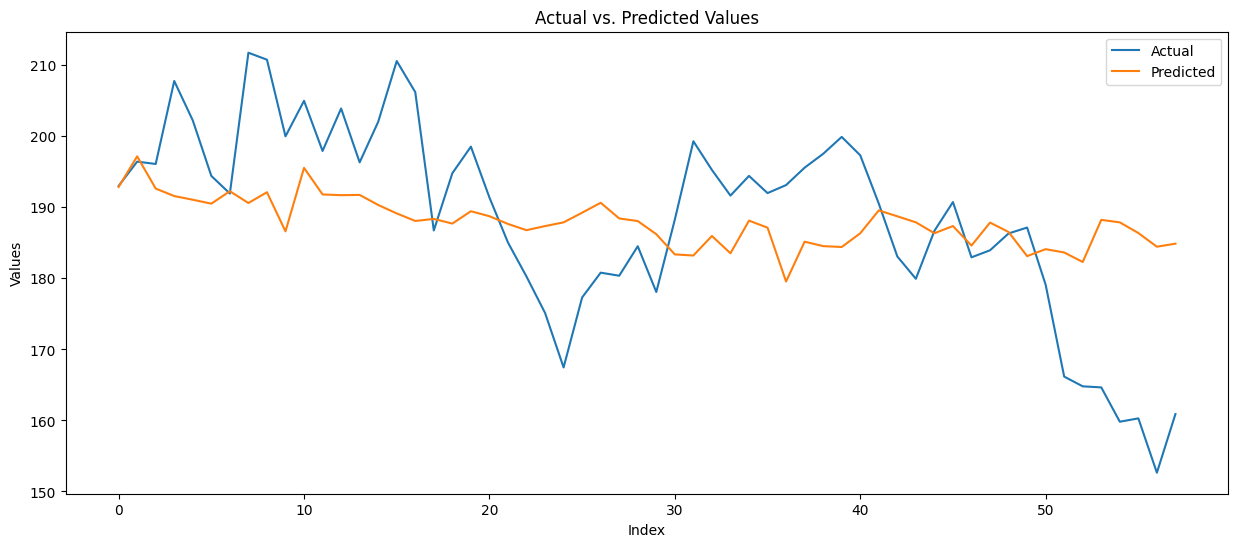

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_test_pred[:, 0], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


Prediction for adj close price

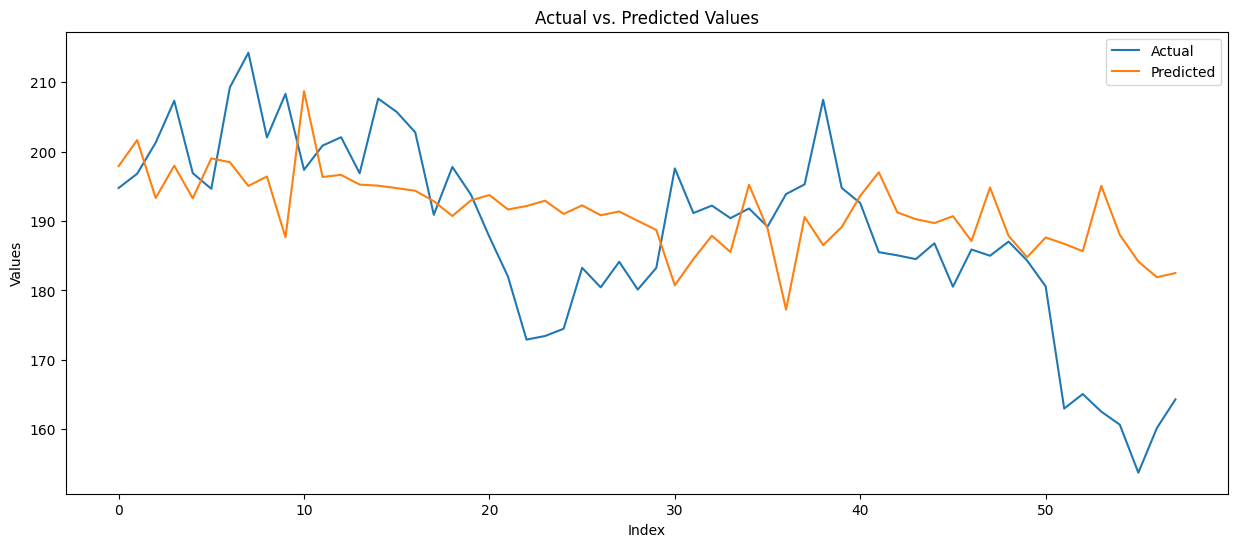

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 1], label='Actual')
plt.plot(y_test_pred[:, 1], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size=0.2, shuffle=False)
X_train.shape

(230, 5, 7)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
X_train.shape

(207, 5, 7)

In [ ]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_train.shape
y_train = y_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

nsamples, nx, ny = y_test.shape
y_test = y_test.reshape((nsamples,nx*ny))

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_test_pred = inference_scaler.inverse_transform(y_pred)
y_test = inference_scaler.inverse_transform(y_test)

print("For open price: ")
mae = mean_absolute_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 0], y_test_pred[:, 0])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

print("\n\nFor Adj Close price: ")
mae = mean_absolute_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAE on testing data for TabNet: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test[:, 1], y_test_pred[:, 1])
print(f"MAPE on testing data for TabNet: {mape:.4f}")

For open price: 
MAE on testing data for TabNet: 8.2745
MAPE on testing data for TabNet: 0.0432


For Adj Close price: 
MAE on testing data for TabNet: 9.9369
MAPE on testing data for TabNet: 0.0519


Prediction for open price

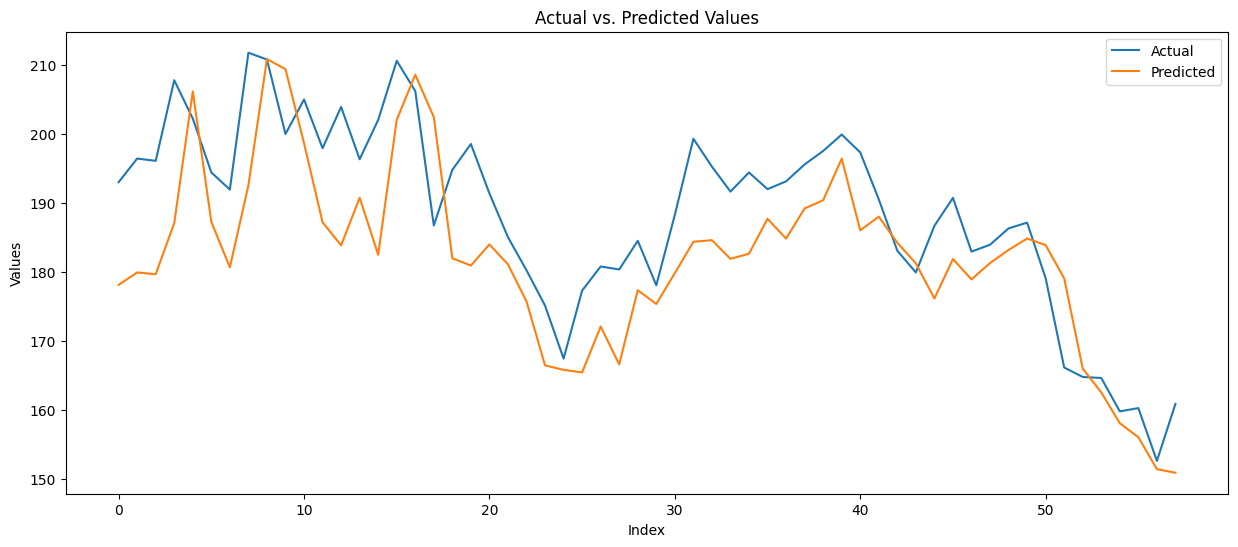

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_test_pred[:, 0], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Prediction for adjusted close price

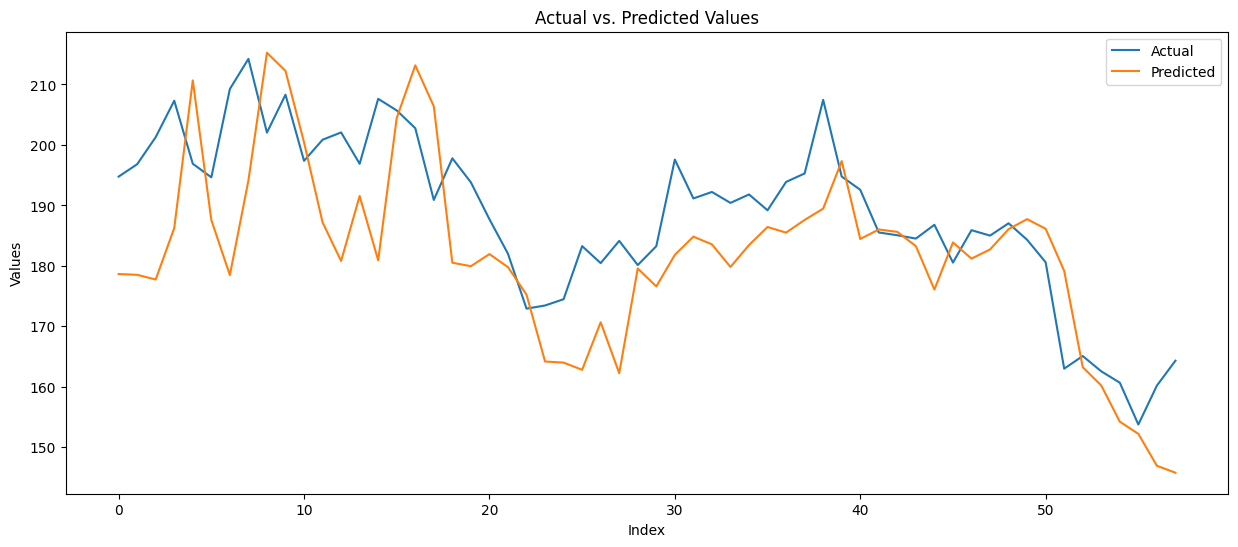

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test[:, 1], label='Actual')
plt.plot(y_test_pred[:, 1], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### CNN - LSTM based neural network

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size=0.2, shuffle=False)
X_train.shape

(230, 5, 7)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
X_train.shape

(207, 5, 7)

In [ ]:
def model_architecture(input_shape):

    tf.random.set_seed(seed)

    cnn_lstm_model = Sequential()
    cnn_lstm_model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='valid', input_shape=input_shape))
    cnn_lstm_model.add(MaxPooling1D(pool_size=2, strides=2))
    cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, strides=1, padding='valid'))
    cnn_lstm_model.add(MaxPooling1D(pool_size=1, strides=2))
    cnn_lstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))
    cnn_lstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))
    cnn_lstm_model.add(Dense(32, activation='relu'))
    cnn_lstm_model.add(Dense(train_target.shape[2], activation='relu'))

    cnn_lstm_model.compile(optimizer='adam', loss='mse')
    cnn_lstm_model.summary()

    return cnn_lstm_model

In [ ]:
cnn_lstm_model = model_architecture((X_train.shape[1],X_train.shape[2]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 128)            1920      
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 128)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             16448     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 bidirectional (Bidirection  (None, 1, 512)            657408    
 al)                                                             
                                                        

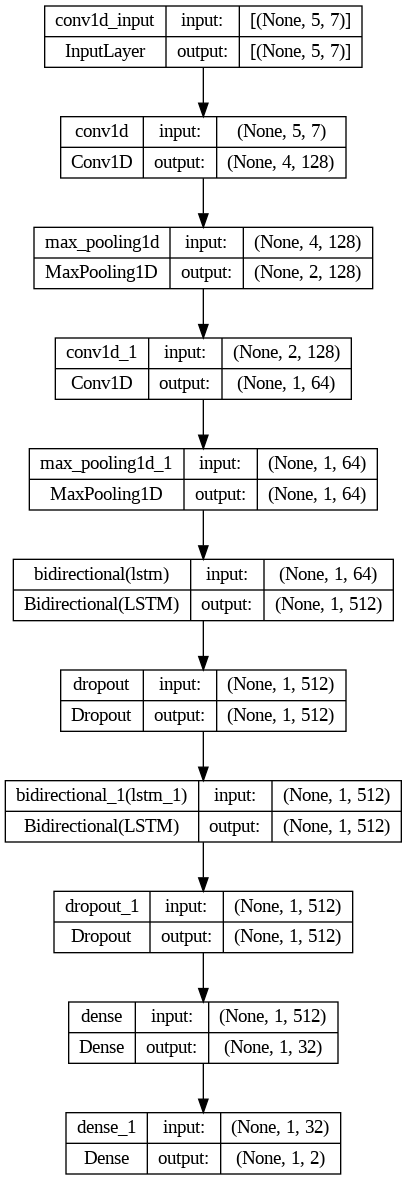

In [ ]:
from keras.utils import plot_model
plot_model(cnn_lstm_model, to_file='cnn_lstm_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = cnn_lstm_model.fit(X_train, y_train,
                             epochs=70,
                             batch_size=64,
                             validation_data=(X_val, y_val),
                             verbose=1)

Epoch 1/70
4/4 [==============================] - 12s 669ms/step - loss: 0.2947 - val_loss: 0.0158
Epoch 2/70
4/4 [==============================] - 0s 62ms/step - loss: 0.1888 - val_loss: 0.0216
Epoch 3/70
4/4 [==============================] - 0s 70ms/step - loss: 0.1770 - val_loss: 0.0151
Epoch 4/70
4/4 [==============================] - 0s 62ms/step - loss: 0.1819 - val_loss: 0.0186
Epoch 5/70
4/4 [==============================] - 0s 66ms/step - loss: 0.1759 - val_loss: 0.0186
Epoch 6/70
4/4 [==============================] - 0s 64ms/step - loss: 0.1739 - val_loss: 0.0147
Epoch 7/70
4/4 [==============================] - 0s 69ms/step - loss: 0.1751 - val_loss: 0.0145
Epoch 8/70
4/4 [==============================] - 0s 61ms/step - loss: 0.1733 - val_loss: 0.0143
Epoch 9/70
4/4 [==============================] - 0s 65ms/step - loss: 0.1732 - val_loss: 0.0122
Epoch 10/70
4/4 [==============================] - 0s 61ms/step - loss: 0.1471 - val_loss: 0.0042
Epoch 11/70
4/4 [==========

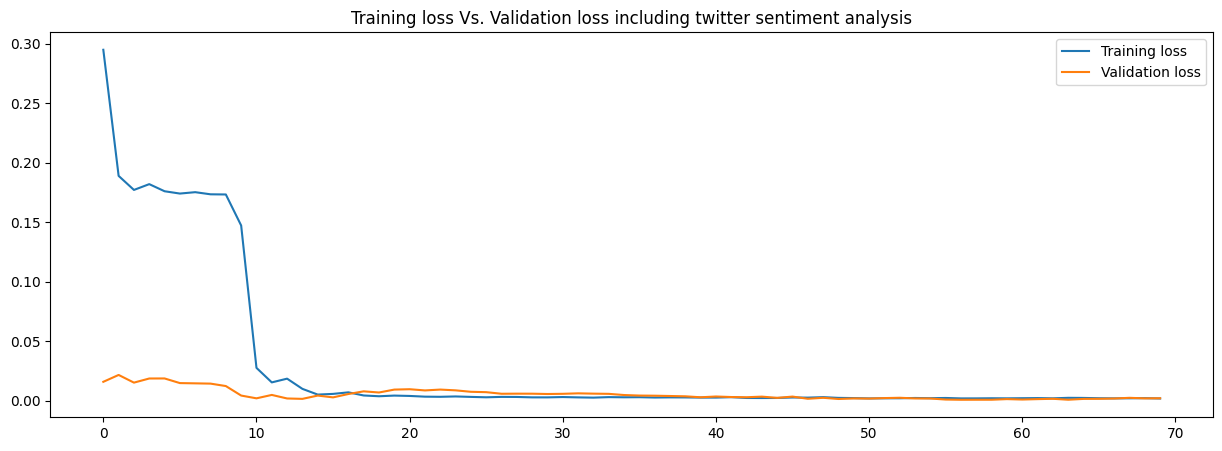

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training loss Vs. Validation loss including twitter sentiment analysis')
plt.legend()

In [ ]:
def predictions_plot(type, dates, y_actual, y_pred_lstm):
    predicted_features=['Open','Adj Close']
    for i,predicted_feature in enumerate(predicted_features):
        plt.figure(figsize=(15,6))

        plt.title(f'LSTM {type} prediction of {predicted_feature} feature with twitter sentiment analysis')

        sns.lineplot(x=dates, y=y_actual[:,i],label='Actual')
        sns.lineplot(x=dates, y=y_pred_lstm[:, i], label='Predicted')
        plt.show()

        mae = mean_absolute_error(y_actual[:,i], y_pred_lstm[:, i])
        print(f'MAE for {predicted_feature} : {mae}\n\n')

        mape = mean_absolute_percentage_error(y_actual[:,i], y_pred_lstm[:, i])
        print(f'MAPE for {predicted_feature} : {mape}\n\n')

In [ ]:
training_dates= training_df.index[:X_train.shape[0]]


training_prediction = cnn_lstm_model.predict(X_train)
training_prediction=training_prediction.reshape(training_prediction.shape[0], training_prediction.shape[2])
y_train_pred = inference_scaler.inverse_transform(training_prediction)

y_train_reshaped = y_train.reshape(y_train.shape[0], y_train.shape[2])

y_train_actual = inference_scaler.inverse_transform(y_train_reshaped)

7/7 [==============================] - 5s 22ms/step


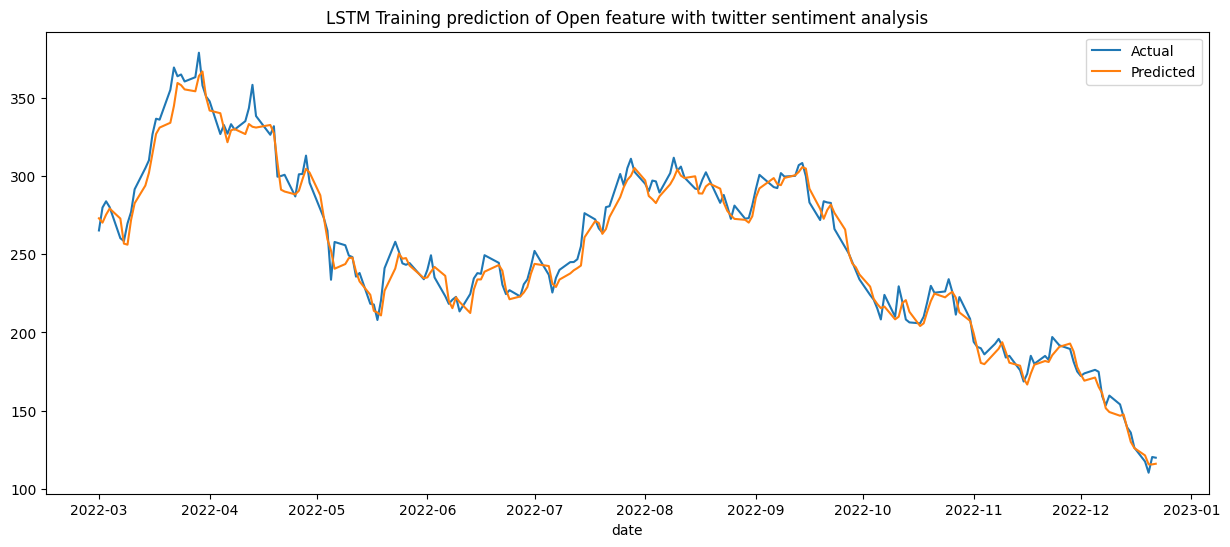

MAE for Open : 6.202462053529304


MAPE for Open : 0.02463812866808936




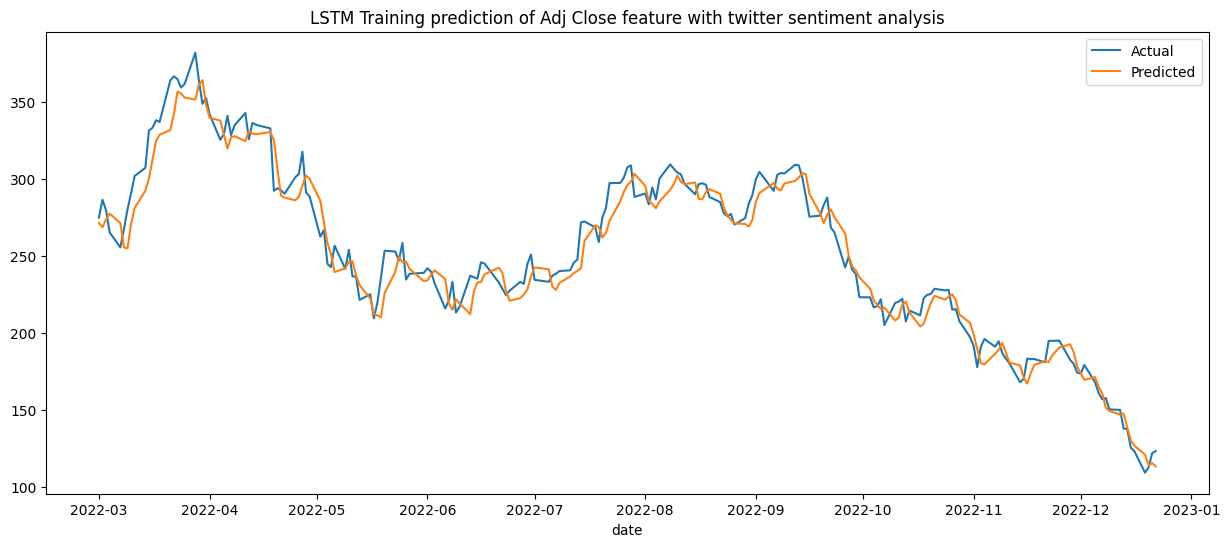

MAE for Adj Close : 9.418356964553611


MAPE for Adj Close : 0.03739453976220009




In [ ]:
predictions_plot('Training', training_dates, y_train_actual, y_train_pred)

In [ ]:
validation_dates= training_df.index[X_train.shape[0]:X_train.shape[0] + X_val.shape[0]]



validation_prediction = cnn_lstm_model.predict(X_val)
validation_prediction=validation_prediction.reshape(validation_prediction.shape[0], validation_prediction.shape[2])
y_val_pred = inference_scaler.inverse_transform(validation_prediction)

y_val_reshaped = y_val.reshape(y_val.shape[0], y_val.shape[2])

y_val_actual = inference_scaler.inverse_transform(y_val_reshaped)

1/1 [==============================] - 0s 29ms/step


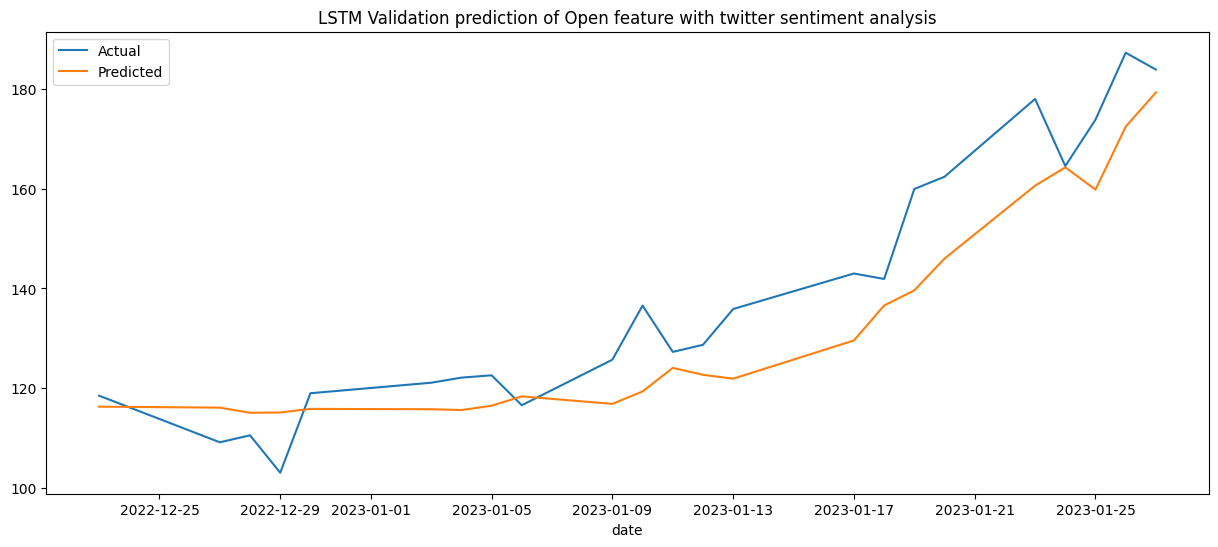

MAE for Open : 8.900416498598846


MAPE for Open : 0.06285980221553913




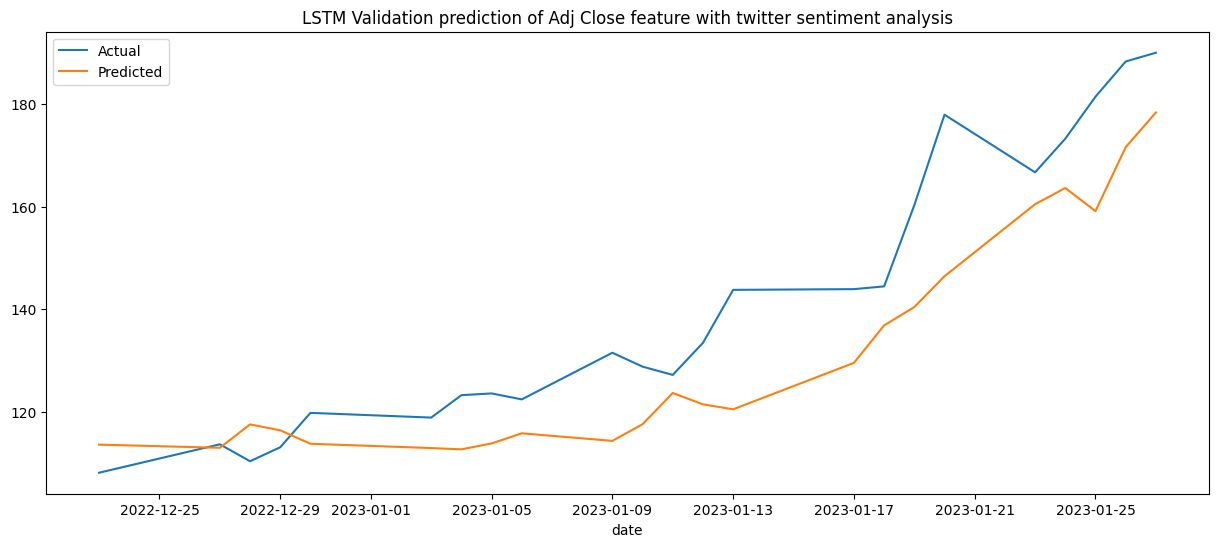

MAE for Adj Close : 11.41735408617102


MAPE for Adj Close : 0.07768938492632403




In [ ]:
predictions_plot('Validation', validation_dates,y_val_actual,y_val_pred)

In [ ]:
testing_dates= training_df.index[-X_test.shape[0]:]


testing_prediction = cnn_lstm_model.predict(X_test)
testing_prediction=testing_prediction.reshape(testing_prediction.shape[0], testing_prediction.shape[2])
y_test_pred = inference_scaler.inverse_transform(testing_prediction)

y_test_reshaped = y_test.reshape(y_test.shape[0], y_test.shape[2])

y_test_actual = inference_scaler.inverse_transform(y_test_reshaped)

2/2 [==============================] - 0s 14ms/step


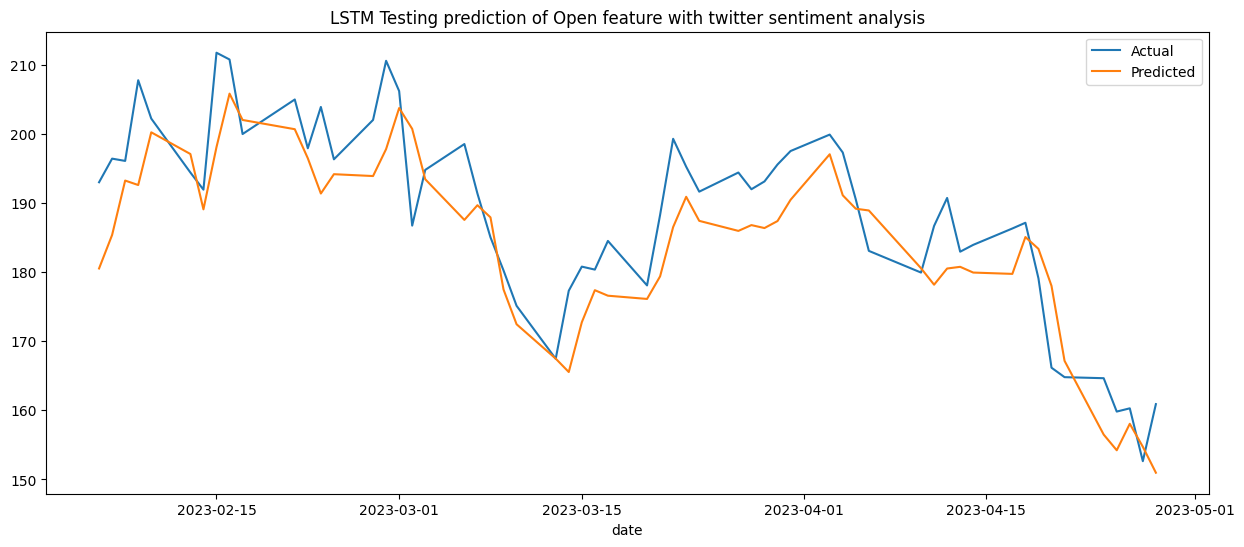

MAE for Open : 5.953837427599678


MAPE for Open : 0.031407717495957416




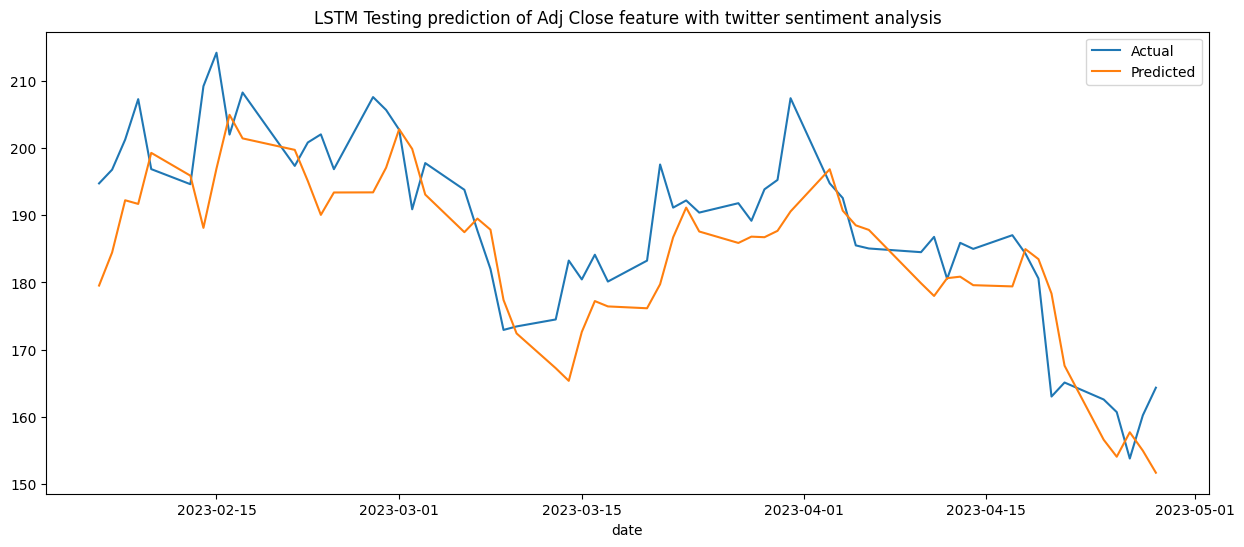

MAE for Adj Close : 6.859101657209727


MAPE for Adj Close : 0.03607985264633327




In [ ]:
predictions_plot('Testing',testing_dates,y_test_actual,y_test_pred)

From the MAE and MAPE scores and prediction plots for different models, it is seen that CNN-LSTM based model performed the best followed by Random Forest regression model.